In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [46]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

In [40]:
# Calculate the date 1 year ago from the last data point in the database

last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date

('2017-08-23')

In [41]:
prev_year = dt.date(2017,8,23) - dt.timedelta(days=365)
prev_year

datetime.date(2016, 8, 23)

In [42]:
# Perform a query to retrieve the data and precipitation scores

scores = session.query(Measurement.prcp, Measurement.date).\
    filter(Measurement.date >= prev_year).\
    order_by(Measurement.date).all()
scores

[(0.0, '2016-08-23'),
 (0.15, '2016-08-23'),
 (0.05, '2016-08-23'),
 (None, '2016-08-23'),
 (0.02, '2016-08-23'),
 (1.79, '2016-08-23'),
 (0.7, '2016-08-23'),
 (0.08, '2016-08-24'),
 (2.15, '2016-08-24'),
 (2.28, '2016-08-24'),
 (None, '2016-08-24'),
 (1.22, '2016-08-24'),
 (2.15, '2016-08-24'),
 (1.45, '2016-08-24'),
 (0.08, '2016-08-25'),
 (0.08, '2016-08-25'),
 (0.0, '2016-08-25'),
 (0.0, '2016-08-25'),
 (0.21, '2016-08-25'),
 (0.06, '2016-08-25'),
 (0.11, '2016-08-25'),
 (0.0, '2016-08-26'),
 (0.03, '2016-08-26'),
 (0.02, '2016-08-26'),
 (0.04, '2016-08-26'),
 (0.0, '2016-08-26'),
 (0.01, '2016-08-26'),
 (0.0, '2016-08-27'),
 (0.18, '2016-08-27'),
 (0.02, '2016-08-27'),
 (0.0, '2016-08-27'),
 (0.12, '2016-08-27'),
 (None, '2016-08-27'),
 (0.01, '2016-08-28'),
 (0.14, '2016-08-28'),
 (0.14, '2016-08-28'),
 (0.14, '2016-08-28'),
 (0.6, '2016-08-28'),
 (2.07, '2016-08-28'),
 (0.0, '2016-08-29'),
 (0.17, '2016-08-29'),
 (0.04, '2016-08-29'),
 (None, '2016-08-29'),
 (0.0, '2016-08-29'),

In [103]:
# Save the query results as a Pandas DataFrame and set the index to the date column

df = pd.DataFrame(scores)
df.head()

,prcp,date
0,0.00,2016-08-23
1,0.15,2016-08-23
2,0.05,2016-08-23
3,NaN,2016-08-23
4,0.02,2016-08-23


In [45]:
df.set_index('date').head()

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02


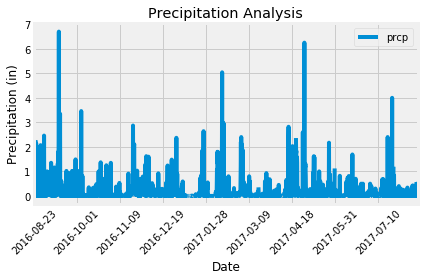

In [104]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot('date', 'prcp')
plt.xlabel("Date")
plt.ylabel("Precipitation (in)")
plt.title("Precipitation Analysis")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Precip_Analysis.png")
plt.show()

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
results.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [49]:
# Design a query to show how many stations are available in this dataset?

stations = session.query(Measurement).group_by(Measurement.station).count()
stations

9

In [51]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

active_station = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).\
               order_by(func.count(Measurement.tobs).desc()).all()

active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [52]:
most_active = active_station[0][0]
most_active

'USC00519281'

In [69]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
filter(Measurement.station == most_active).all()

[(54.0, 85.0, 71.66378066378067)]

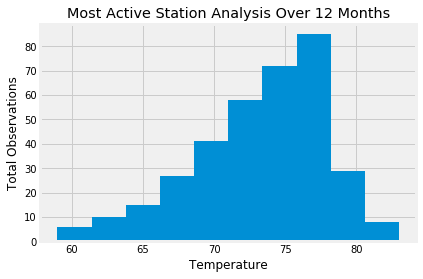

In [79]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temp1 = session.query(Measurement.tobs, Measurement.date, Measurement.station).\
    filter(Measurement.station == most_active).\
    filter(Measurement.date > prev_year).\
    order_by(Measurement.date).all()

# temp1

temp_graph = pd.DataFrame(temp1)
plt.hist(temp_graph ['tobs'])
plt.xlabel("Temperature")
plt.ylabel("Total Observations")
plt.title("Most Active Station Analysis Over 12 Months")
bins = 12
plt.savefig('Most_Active_Station_Analysis.png')
plt.show()

![precipitation](Images/station-histogram.png)

In [17]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [95]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

arrive = dt.date(2017, 2, 28)
depart = dt.date(2017, 3, 5)
prev = dt.timedelta(days=365)
temp_prev_year = (calc_temps((arrive-prev), (depart-prev)))
print(temp_prev_year)

[(62.0, 69.65789473684211, 79.0)]


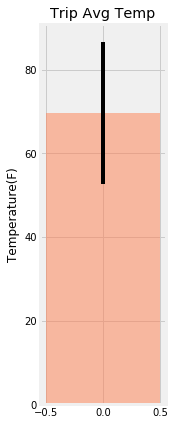

In [96]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

tmin = temp_prev_year[0][0]
tavg = temp_prev_year[0][1]
tmax = temp_prev_year[0][2]
yerr = tmax-tmin

plt.figure(figsize=(2,7))
plt.bar(0,tavg,yerr=yerr,align="center",width=1,color="coral",alpha=0.5)
plt.ylabel("Temperature(F)")
plt.title("Trip Avg Temp")
plt.savefig("Trip_Avg_Temp_Analysis.png")
plt.show()

In [101]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

total_rain = session.query(Measurement.station, func.sum(Measurement.prcp))\
                       .filter(Measurement.date>=arrive).filter(Measurement.date<=depart)\
                       .group_by(Measurement.station).order_by(func.sum(Measurement.prcp).desc()).all()
# total_rain

sel = [Measurement.station,Station.name,func.sum(Measurement.prcp),Station.latitude,Station.longitude,Station.elevation]
total_rain = session.query(*sel).filter(Measurement.station==Station.station)\
                       .filter(Measurement.date>=arrive).filter(Measurement.date<=depart)\
                       .group_by(Measurement.station).order_by(func.sum(Measurement.prcp).desc()).all()
# total_rain

for rain in total_rain:
    print(rain)

('USC00519281', 'WAIHEE 837.5, HI US', 4.720000000000001, 21.45167, -157.84888999999998, 32.9)
('USC00513117', 'KANEOHE 838.1, HI US', 4.45, 21.4234, -157.8015, 14.6)
('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 4.07, 21.3331, -157.8025, 152.4)
('USC00517948', 'PEARL CITY, HI US', 2.98, 21.3934, -157.9751, 11.9)
('USC00519397', 'WAIKIKI 717.2, HI US', 2.7399999999999998, 21.2716, -157.8168, 3.0)
('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2.32, 21.33556, -157.71139, 19.5)
('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 1.1600000000000001, 21.5213, -157.8374, 7.0)


## Optional Challenge Assignment

In [21]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [22]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [23]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [24]:
# Plot the daily normals as an area plot with `stacked=False`
